<a href="https://colab.research.google.com/github/Sathvik2954/IIITH-Aiml-Course-2025/blob/main/AIML_Course_Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics and Probability: Fundamentals

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

# What is Probability?

## Definitions

In nature as in Compute Science, one of several events can be predicted to occur, but we do not know exactly which of them will occur. The supposition is that they will occur with different frequencies, and we know those frequency. So each time we run the experiment, we call is a **sample**.

The thing that we are computing the probability of is typically a boolean condition.
* Whether or not the sample belongs to a set: Does a integer sampled randomly belong to the set of natural numbers?
* Any set of boolean conditions on that set: Is an integer samples randomly prime, and it's either greater than 100 or less than 50.
* By membership in a continuous set: Is the speed of the car in the range 60 to 80.8 km per hour.

Given this boolean formulation, we can construct a set of elements which we are computing the probability of. We will call these favorable samples.

$$P = \frac{\text{number of favorable samples}}{\text{number of samples}}$$

For now assume that all samples in our set of all possibilities (i.e. sample space) are equally likely. This need not be true, the samples can themselves be chosen from some probability distribution, a proposition which we will encounter when we study conditional probability.

In [2]:
def toss_coin(number_of_tosses=1000):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=1000):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

In [3]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Heads    509
Tails    491
Name: count, dtype: int64


## Derived Probability Distributions

Given the simple fact that each toss will be heads or tails (also called a bernoulli distribution) we can come up with a derived question, that given 20 coin tosses, what is the probability that 7 of them are heads.

You can see the probability distribution below, it's called a Binomial distribution and looks like a Bell. This will always happen whenever you have a bunch of independently sampled variables. (Independent and Identical, see Central Limit Theorem)

In [4]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(10000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

Let's try to see if we toss the coin 500 times, then what happens. Looks similar, and more like a bell than before.

In [5]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(50000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),y=results.value_counts().values)])
fig.show()

## How much to Sample

It's hard to estimate the probability of real world events experimentally. Like what is the probability of rolling a dice and getting a 2. Well, it's 1/6, easy to see theoretically. Often it won't be, in which case we need to see from experiments what the answer is.

We have the 1/6 theoretical result as a Red line. The probability of getting each number from 1 to 6 is shown, but the different colors represent the different number of experiments it was sampled from. Blue was estimated using 10 experiments, Red using 100, Green with a 1000, Purple with 10000, and Orange with 100000. You can see that as we get more samples, the correctness and the reliability of that correctness increases.

You can also see, that if we took 100 samples, and we have a value far away from 1/6, taking more samples will take us back to 1/6 in time. This phenomenon is called **Regression to the Mean** and you can hear more about it in the following Veritasium videos.

In [6]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

## Traps of Statistics in the Real world

Vertiasium and 3Blue1Brown are some of the best instructors in taking phenomena in the real world and taking them apart in the language of mathematics, analyzing how good and correct are the solutions we pose to them. Following couple of videos are excellent demonstrators of how we apply probability in the real world, and how the entire world might often misapply it, or atleast misinterpret or partially interpret what the math is saying. Do take a look.

* Veritasium: Is most published research wrong? https://youtu.be/42QuXLucH3Q
* Veritasium: How we're fooled by statistics https://youtu.be/1tSqSMOyNFE

## Try to solve for these

1. If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

2. In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.

3. Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

4. Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.

# **Solutions**

In [ ]:
#If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.
numbered_cards = 9*4
total_cards = 52
probability = numbered_cards/total_cards
print(f"Probability: {probability:.4f}")

Probability: 0.6923


In [ ]:
#In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.
numbered_cards = 9 * 4
total_cards = 52
#Since we replace and shuffle, events are independent
prob_one_draw = numbered_cards / total_cards
prob_both = prob_one_draw ** 2
print(f"Probability: {prob_both:.4f}")

Probability: 0.4793


In [7]:
#Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.
numbered_cards = 36
total_cards = 52
prob_both = (numbered_cards / total_cards) * ((numbered_cards - 1) / (total_cards - 1))
print(f"Probability: {prob_both:.4f}")

Probability: 0.4751


In [8]:
#Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.
suits = ['Spades', 'Hearts', 'Diamonds', 'Clubs']
ranks = ['Ace'] + [str(i) for i in range(2, 11)] + ['Jack', 'Queen', 'King']
deck = []
for suit in suits:
    for rank in ranks:
        deck.append(f"{rank} of {suit}")
numbered_bottom_cards = 0
for position in range(1, 52):
    card = deck[position - 1]
    rank = card.split()[0]
    if rank in {'2', '3', '4', '5', '6', '7', '8', '9', '10'}:
        numbered_bottom_cards += 1
probability = numbered_bottom_cards / 51
print(f"Probability: {probability:.4f}")

Probability: 0.7059


## Fundamentals of Probability

For your reference, the rules of probability are reproduced as follows:
1. The probability of an event A is between 0 and 1 (inclusive): $0 \leq p(A)\leq 1$
2. The sum of the probability of all possible events (the *sample space*) is 1. $\Sigma^n_{i=0} p(A_i)=1$
3. The sum of the probability of an event and its complement is 1. $p(A^C)+p(A) = 1$
4. (Addition Rule) The probability of event A *or* event B happening is equal to the sum of the probabilities of event A and event B happening respectively, *less* the probability of event A **and** event B. $p(A \cup B)= p(A) + p(B) - p(AB)$
5. (Multiplicative Rule) If events A and B are independent, then the probability of event A and B jointly occuring is the product of the probabilities of events A and B respectively. $p(AB) = p(A)p(B)$

<div class="alert alert-info">
📝 <b>Note:</b> Events A and B are independent if the occurence of event A doesn't change the likelihood of Event B occuring. Do not confuse this with <b>mutually exclusive</b> events. If events A and B are mutually exclusive (disjoint), they cannot both happen.
</div>

# What is Expectation?

In any set of possible events, we can compute the probability of each of those events. We saw that all events can happen with probability of 1/6. Or sometimes, you can have one event with probability 1/6 and another with 5/6.

Now what if each of these outcomes was associated with a quantity. For eg. if you toss a coin and it's heads, you get Rs. 5. If it's tails, you lose Rs. 2. Will you play this game the coin is fair?

Of course you will. Because you feel that on average you will get $\frac{5 - 2}{2} = 1.5$ rupees as your winnings per round.

But what if the coin is biased. It comes heads $\frac{1}{6}$ of the time and $\frac{5}{6}$ of the time it's tails. Now you might not be sure, so let's try to take the weighted average.

$$E = \frac{1}{6} \times 5 - \frac{5}{6} 2 = \frac{5 - 10}{6} = -\frac{5}{6}$$, so you are losing slightly less than a rupee every round, not a favorable game to play. This value, the weighted sum of the "value" of each outcome is called the expectation. Mathematically:

$$E = \sum_{i \in S} P_i V_i$$

Where S is the sample space, $P_i$ is the probability of the sample, and $V_i$ is the value associated with the sample. $i$ is each possible sample in the sample space.

## Simulating to compute Expectation

Let's test your basic coding skills:

> You have a suffled deck of 52 cards, 4 of which are aces. You are to draw cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?

Whether or not you can solve this mathematically, try computing this numerically, that is by simulation in code.

**Do not look at the solution given below.**


In [13]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']
    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)
    return np.mean(cards_thrown_counts), cards_thrown_counts
expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

9 cards were thrown: JH 9C KC 9D 5D JD 10D 9S JS AS
16 cards were thrown: 4S 3H 3C 2H 2D 4C JC 4H 3S QC 9C 6S JS 7H 9H 8H AS
16 cards were thrown: 4S 6H QH JS JC 5S 8C 7C JH 9H JD 5H KH 4D 9C 10S AS
8 cards were thrown: 8S KH 5C QC 7C 9S 3D 3H AS
3 cards were thrown: 2H 9D 10S AS
9 cards were thrown: QS 9D 5S QH 7H 6C 7C 9H 8H AH
2 cards were thrown: 5S 6H AC
16 cards were thrown: QS 2D 5H 2C 9D QC 10S 3S 2H JS 3D 2S QD 5C 6C KD AD
18 cards were thrown: 10H KC 5D 6S 4C 3C KD 10C 7S QC 4S QH 6C 8C 7D 2D 5C JH AC
11 cards were thrown: 4S 3D 3C 9D 9C 5H QD 10S KH 8C 2C AS

9.4903 cards are tossed before we see the first ace!


## Visualize the Underlying Probability Mass Function

If you guess mathematically, you will guess that almost 1/13 cards are aces, so about 12 can be met on average before you see your first ace. And you won't be totally wrong.

Of course the percentage of aces increases as you keep throwing away the cards, so the actual expectation is not that.

Let's see the probability distribution for it!

In [14]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

## A new trick - Technique of Contributions (Optional)

The correct way to solve for this is not particularly relevant for this course. However, if you are interested, it's called the **Technique of Contributions**.

You can say that if there was only 1 non-ace card, and 4 aces in the deck, the number of cards thrown would be $\frac{1}{5}$, since if and only if the numbered card is the first one you pick do you throw away a card, otherwise it's 0. So the card contributes $\frac{1}{5}$ to the answer, which it does if it's picked before any of the 4 aces.

Now each of the cards are non-interacting, and there are $48$ non-ace cards, so our answer would be $\frac{48}{5} = 9.6$

This is exactly what we simulated.

# Measurements and Errors

## Using Mean Squared Error

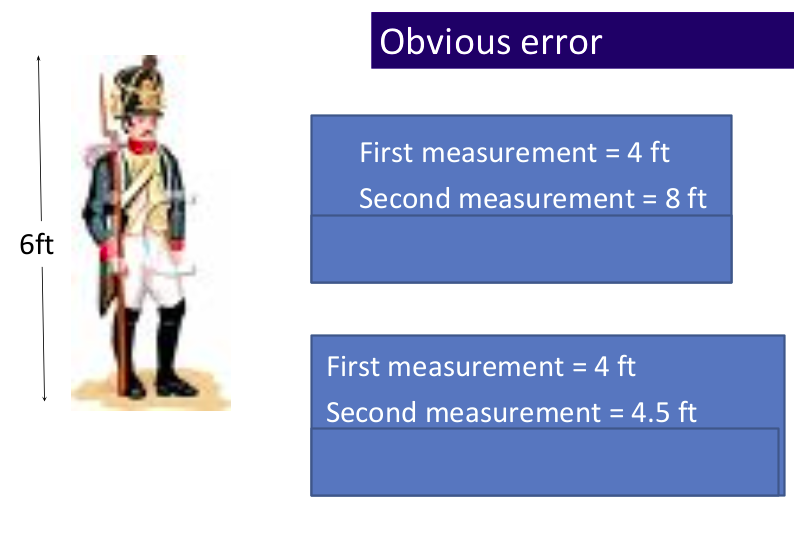

Suppose you are measuring the height of a person. You have several students, each of whom take 2 readings.

* Student 1: 4 feet and 8 feet.
* Student 2: 4 feet and 4.5 feet.
* Student 3: 6 feet and 6 feet
* Student 4: 6 feet and 10 feet

How will you rate these students?

My estimate is that would would want to rank them as:
* Student 3
* Student 2
* Student 1
* Student 4

This is because 3 is correct.
2 is wrong, but he made a 2 foot and a 1.5 foot error.
1 is worse, **even though his average is correct**, he messed up by 2 feet each time, so he should be penalized for his 2 feet errors and not let the 2 errors cancel each other out (we need absolute value of errors or square of errors to do this).
4 is the worst, he has a bizzare 4 foot error. He got to 6 foot once, but that's just by chance, while others mess in 2 feet, his is messing up in 4 feet and is the least reliable. This shows that **outliers should be penalized more**.

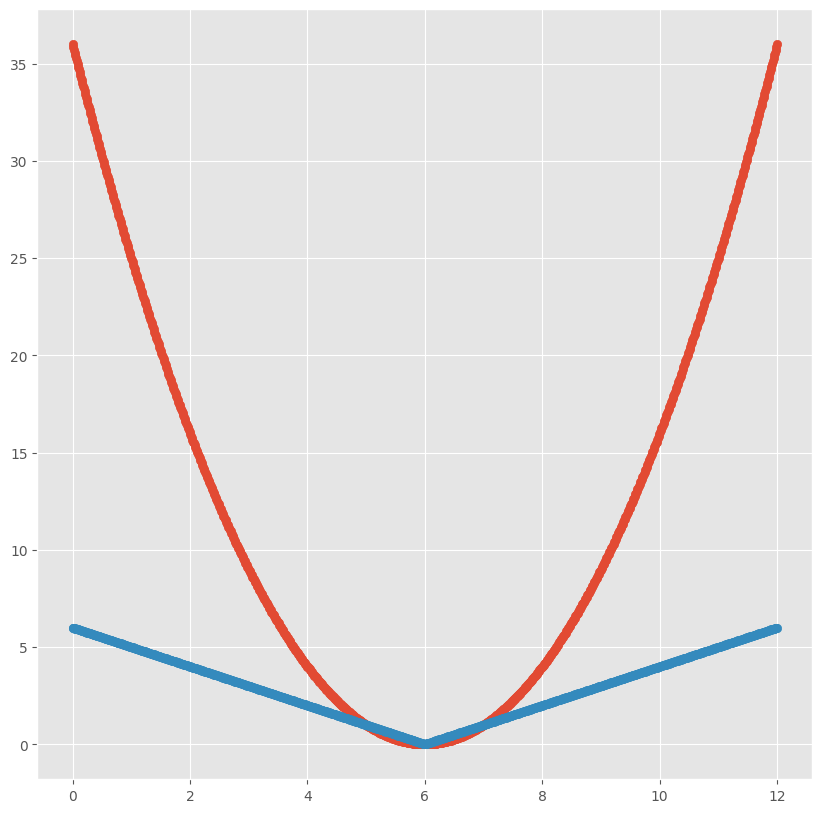

In [15]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

You can see that the Mean Squared eror is a great penalty, because it punishes getting things too wrong a lot more.

## Standardisation

We consider the grades dataset, which contains Physics, Biology and Maths scores for 26 students:

In [17]:
grades = pd.read_csv("https://archive.org/download/ml-fundamentals-data/machine-learning-fundamentals-data/grades.csv")
print(grades.head())
print(grades.shape)
grades.drop(columns=["Name"]).agg(["mean", "var", "std"])

        Name  Physics  Biology  Maths
0     Arnold       80       78     70
1        Bob       60       98     45
2  Cassandra       34       56     65
3    Donovan       56       65     32
4      Emily       98       23     55
(26, 4)


,Physics,Biology,Maths
mean,63.769231,67.038462,69.769231
var,517.224615,456.758462,300.664615
std,22.742573,21.371908,17.339683


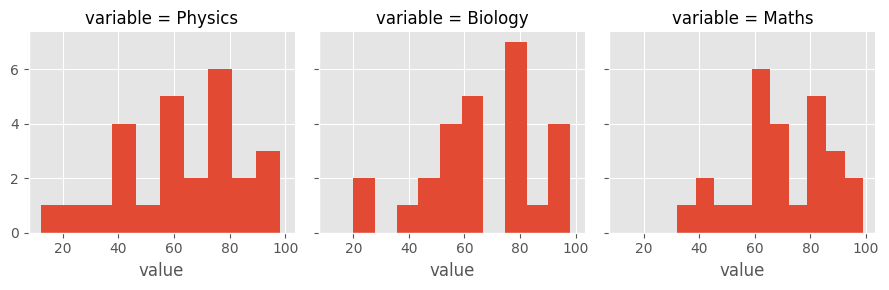

In [19]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

Suppose the instructor wanted to provide the students with an idea of how well they are performing relative to their peers, but not their exact score. This can be done by **standardising** the scores. This is done by subtracting the mean and re-scaling the data to be in units of standard deviations.  

In [20]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()

In [21]:
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


What can we conclude?

Firstly, Arnold and Emily are above average Physics students, whereas Bob, Cassandra and Donovan are below average.

Also, Emily's scores are **1.5 standard deviations above the mean**, whereas Cassandra's scores are **1.3 standard deviations below the mean**.

More importantly, standardisation allows us to compare the results from different exams. Standardisation allows each of the variables to be expressed in common units: their respective standard deviation.

We can do the same for Math scores, which have a lower variance than Physics scores:

In [22]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


What do we observe?

 - While Arnold is doing really well in Physics, he's barely above average in Maths.
 - Bob, Cassandra and Donovan are below average in both Physics and Maths.
 - While Emily seems to be an above average Physics student, she's quite the opposite when it comes to Maths.

# Mathematics of Probability

## Conditional Probability
|Sex/Handedness|Right handed| Left handed|
|--------------|-----------:|-----------:|
|Male          |43          | 9          |
|Female        |44          | 4          |

The contingency table above summarises some fake data collected from 100 respondents on genders and handedness.

**What is the probability that any one respondent in our survey is female?** To calculate the probability, divide the number of events by the sample space: $\frac{44+4}{100}=0.48$. It is a little more likely that our respondents are male than female.

However, what is the probability that a female in our sample is **left-handed**? Quite unlikely. To quantify the likelihood, we could divide the number of left-handed females by the number of females in our sample: $\frac{4}{48}=\frac{1}{12}$.

$\frac{1}{12}$ is a **conditional probability**: a probability under a condition. Note that to calculate the conditional probability, we restrict the sample space under consideration to a condition, and then recalculate the probability as if the condition were the entire sample space.

A general formula for conditional probability is as follows. The conditional probability of A given B is

$$P(A|B)=\frac{P(A\cap B)}{P(B)}$$

We take the joint probability $P(A\cap B)$ and 'inflate' it with the probability of $P(B)$.

Conditional probabilities are fundamental to the idea of **independence**. Recall that we defined independence of two events A and B as

> the probability of event A is not changed by the occurence of event B.

We can restate the definition above as

$$P(A|B)=P(A)$$

Consider whether handedness is independent of sex. The probability of being left-handed is $11/100$, or 0.11. As you might expect, it's close to the conditional probability $P(left$-$handed|female)=0.12$.

## Law of Total Probability

Let $A_1, \dots A_n$ be mutually exclusive and exhaustive events, where $P(A)\neq 0$ for all $A$. Then, the probability of $P(B)$ can be defined as

$$P(B)=\sum^n_{i=1}P(B|A_i)P(A_i)$$

### Example

The probability that any given person in the population has a disease is 0.1. The likelihood of testing positive for a disease if you have it is 0.95. The probability of testing positive in the absence of the disease (a false positive) is 0.10.

What is the probability of testing positive for the disease?

$$P(T = 1|D = 1) = 0.95$$
$$P(T = 1|D = 0) = 0.10$$
$$P(D = 1) = 0.1$$


$$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.14
\end{align}$$

## Bayes' Theorem

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

$$Posterior=\frac{Likelihood\times Prior}{Evidence}$$

An informal way of putting Bayes' Theorem:

$$P(pred|data)=\frac{P(data|actual)P(actual)}{P(data)}$$

The proof for Bayes' Theorem follows from the definition of conditional independence. We know that

$$\begin{align}
P(A\cap B)&=P(A|B)\times P(B)\\
&=P(B|A)\times P(A)
\end{align}$$

This can be rearranged to state Bayes's Theorem:

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$


**Example 1**

You want to go for a picnic today but it is cloudy in the morning. From experience, you know that:

- the probability of raining on any given day is 10%,
- the probability that it is cloudy on any given day is 40%, and
- 50% of all rainy days start off cloudy.

What is the probability of raining given that it is cloudy?

$P(Rain | Cloud) = \frac {P(Cloud | rain) \times P(rain)}{P(Cloud}=\frac{0.5\times 0.1}{0.4}=0.125$


**Example 2**

The probability that any given person in the population has a disease is 0.1. The likelihood of testing positive for a disease if you have it is 0.95. The probability of testing positive in the absence of the disease (a false positive) is 0.10.

If you have been tested positive for a disease. What is the probability that you actually have the disease?

What is the probability of actually getting the disease given tested positive?

$$P(T = 1|D = 1) = 0.95$$
$$P(T = 1|D = 0) = 0.10$$
$$P(D = 1) = 0.1$$

As we've done earlier, we can use the law of total probability to find $P(T=1)$:

$$\begin{align}
P(T=1)&=P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0)\\
&= 0.95\times 0.1 + 0.10*0.90\\
&=0.14\end{align}$$

Note that $$P(T = 1|D = 1) = 0.95$$ is the likelihood and $$P(D = 1) = 0.1$$ is the prior.


$\begin{align}
P(D=1|T=1)&=\frac{P(T=1|D=1)P(D=1)}{P(T=1)}\\
&=\frac{0.95\times 0.1}{0.14}\\
&=0.68
\end{align}$

## Random variables
- A **continuous random variable** takes on infinitely many values/real numbers. In fact, the probability of a continuous random variable taking on any one value is 0.
- A **discrete random variable** takes on a finite set of values, e.g. counts.

## Probability Distributions
A random variable is a variable whose possible values are the outcomes of a non-deterministic process.

### Binomial distribution

We start with the **binomial distribution**. The binomial distribution models the probability of $k$ successes in $n$ independent trials.

Let's redo the lecture example with `scipy`. Import the `binom` class from `scipy.stats`:

In [23]:
from scipy.stats import binom

If the chance of winning a game is 0.75, what is the probability of losing all 5 games?

Assume the chance of winning each game is independent. Then we can solve this problem using the binomial distribution.

We use the `.pmf` method of the `binom` class. `pmf` stands for **probability mass function**: a function that states the probability that a discrete random variable is equal to any one value.

In [24]:
binom.pmf(k=5, n=5, p=0.25)

np.float64(0.0009765625)

The answer is what we should expect. If we win 3 in 4 games, it's unlikely we lose 5 in 5 games.

Now, suppose we want to know what is the probability of winning 3 games or less. We want to find $P(X \leq 3)$.

Note $P(X \leq 3) = P(X=0)+ P(X=1)+P(X=2)+P(X=3)$.

By the **complement rule**, $P(X \leq 3) = 1 - P(X=5)-P(X=4)$.



In [25]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

np.float64(0.3671875)

Note that we could also answer this by referring to the value of the **cumulative density function** at $X=3$.

The cumulative density function, $F(x)$, is defined as

$$F(x)=P(X\leq x)$$

In [26]:
binom.cdf(3, n=5, p=0.75)

np.float64(0.3671875)

### Normal distribution

We move on to the **normal distribution**. There are some key properties that are important to know about this distribution:

- The mean, median and mode of the distribution is the same.
- The curve is bell-shaped.
- The total area under the curve is 1.
- Symmetric about the mean.

There are two key **shape parameters** that define the location and spread of the normal distribution: the mean, commonly denoted as $\mu$; and the standard deviation, commonly denoted as $\sigma$.

Again, start by importing the `norm` class from `scipy.stats`:

In [27]:
from scipy.stats import norm

#### Standard normal distribution

A normally distributed random variable with mean 0 and standard deviation 1 is said to follow the standard normal distribution, also known as the **z-distribution**.

A normally distributed random variable can be converted into the standard normal distribution by standardisation:

$$Z = \frac{X-\mu}{\sigma}$$

<div class="alert alert-info">
    <b>Note:</b> The <code>.pdf</code> method refers to the <b>probability density function</b>, which is the counterpart of the probability mass function for continuous random variables.
</div>

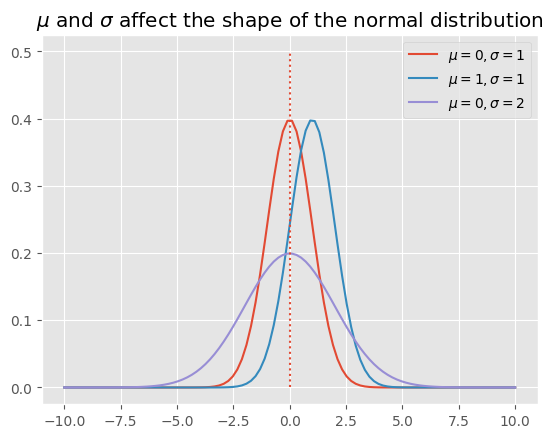

In [28]:
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

With continuous distributions, we do not want to find the probability of a random variable at any given value. Since the range is infinite, the probability that a continuous random variable takes on any given value is zero.

We are usually interested in finding out the probability that the random variable lies between two values.



#### Programmatic solutions: percent point function

Recall the definition of the **cumulative density function**:

$$F(x)=P(X\leq x)$$

The CDF returns the probability that a random variable is less than $x$. For instance, because of the symmetric shape of the normal distribution, the CDF of the standard normal distribution at 0 is expected to be 0.5.

In [29]:
norm.cdf(0)

np.float64(0.5)

We will also use the **percent point function**, available via the `ppf()` method. The percent point function does the inverse of the cumulative density function. It returns the percent point given the value of the CDF:

In [30]:
norm.ppf(0.5)

np.float64(0.0)

#### Standard deviation rule/empirical rule

A useful rule of thumb is the **standard deviation rule**, or empirical rule.

This rule states that for a normally distributed random variable,
- 68% of data lies within 1 standard deviation of the mean.
- 95% of data lies within 2 standard deviations of the mean, and
- 99.7% of data lies within 3 standard deviations of the mean.

#### Example: height

Maalysian males' heights are normally distributed with mean 169.57 and standard deviation 7.57. Answer the following questions programmatically and using the empirical rule.

- 84% of Malaysians have height of less than ... cm.

In [31]:
norm.ppf(0.84, loc=169.57, scale=7.57)

np.float64(177.09804617589782)

In [32]:
169.57 + 7.57

177.14

- The tallest 2.5% of Malaysians are taller than ... cm

In [33]:
norm.ppf(0.975, loc=169.57, scale=7.57)

np.float64(184.4069273629682)

In [34]:
169.57 + 2 * 7.57

184.70999999999998

- The shortest 0.15% of Malaysians are shorter than ... cm

In [35]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

np.float64(147.10422390516268)

In [36]:
169.57 - 3 * 7.57

146.85999999999999

### Poisson distribution

The Poisson distribution models the number of events that occur in a fixed time interval.

Use the Poisson distribution when:
- events occur at random points of time and space, and
- our interest lies is the number of occurrences of the event.

The most important property of the Poisson variable is that the waiting time between events is **memoryless**:
- the time when events occur do not affect the number of successes in an interval;  
- only the length of time affects the number of successes.

The Poisson distribution has a single parameter: lambda ($\lambda$). The mean and variance of the Poisson distribution coincides with the shape parameter $\lambda$.

The probability mass function of the Poisson distribution is as follows:

$$p(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!}$$

In [37]:
from scipy.stats import poisson

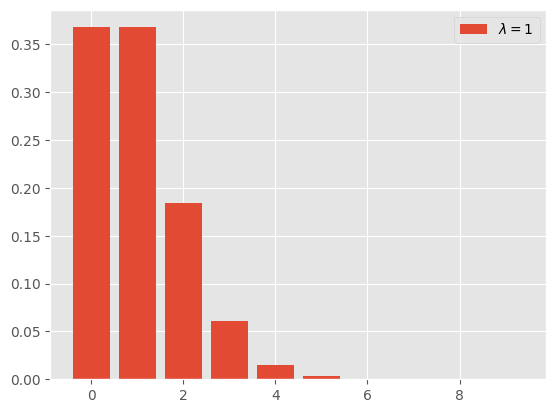

In [38]:
# a Poisson distribution with lambda=1 can be interpreted as:
# on average, 1 event occurs within the set time interval.
# naturally, it is less likely that more than 1 event occurs.
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)
plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

In [39]:
# the average can be calculated by multiplying the inputs with the values of the PMF
x @ f1
# see that this is equal to lambda

np.float64(0.999998874797402)

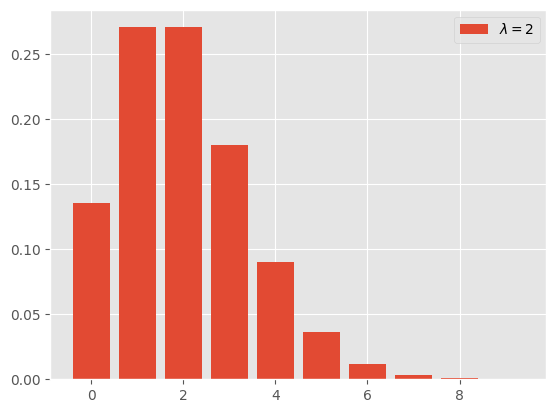

In [40]:
# for lambda=2, having 2 events is a lot more likely

plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [41]:
x @ f2

np.float64(1.999525105343477)

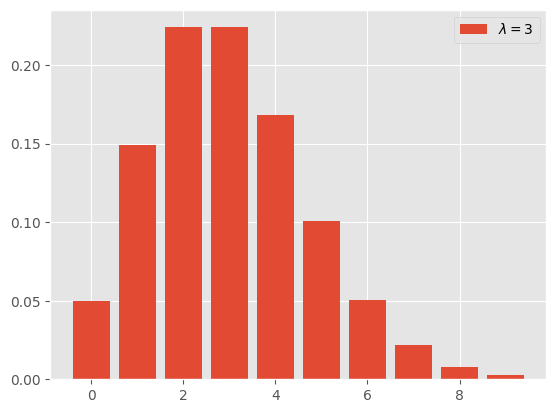

In [42]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [43]:
x @ f3

np.float64(2.9885910238149727)

**Example**: Suppose emergency calls per hour follow a Poisson distribution and occur at a rate of 5 calls per hour. What is the probability of receiving 3 calls in any given hour?

In [44]:
poisson.pmf(3, 5)

np.float64(0.1403738958142805)

## Central Limit Theorem

The Central Limit Theorem helps us reason about realisations of sample means.

Specifically, it tells us that in many repeated samples, the distribution of the sample means of a random variable is normal regardless of the underlying population distribution.

In [45]:
from scipy.stats import poisson

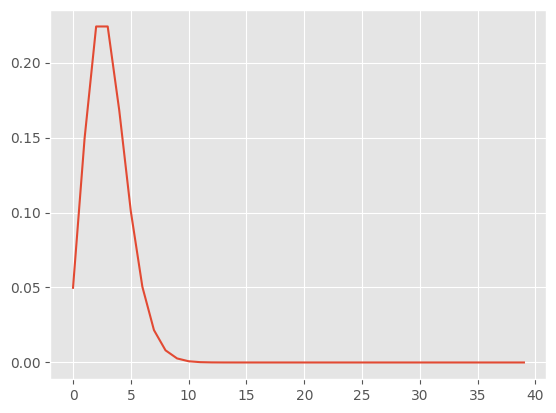

In [46]:
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([12., 22., 57., 64., 65., 78., 53., 25., 20.,  4.]),
 array([2.15, 2.34, 2.53, 2.72, 2.91, 3.1 , 3.29, 3.48, 3.67, 3.86, 4.05]),
 <BarContainer object of 10 artists>)

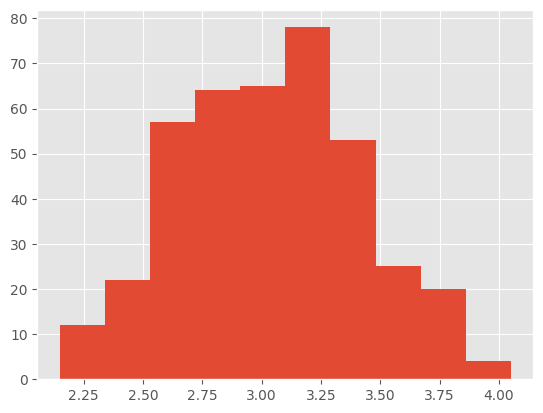

In [47]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

# Using Normal Distribution in Weight Initialization

**Normal Distribution** could be very helpful when it comes to weight initialization of deep learning task.

In deep neural network, we may encounter vanishing/exploding gradients when the derivaties become very small or very big. The activations and derivatives will be decreased/increased exponentially as a function of number of layers. This will make training difficult, especially when gradients are exponentially smaller, then gradient descent wiill take tiny little steps. Consequently it will take a long time for gradient descent to learn anything.

Therefore, using a normal distributed weight initiallization with mean equals to 0 and a standard deviation of 1 could be helpful in resolving the issue.

For example, when we using ReLU as our activation function, we would do the following steps:

- Generate random sample of weights from a Normal Distribution having mean equals 0 and a standard deviation of 1.
- Multiply the sample with $\sqrt{(\frac{2}{n_i})}$, where $n_i$ is number of input units for that layer.

```np.random.rand(shape) * np.sqrt(2/n[l-1])```, where `l` is the total number of input units.

> This initialization is also called **Xavier Initialization**.

This sort of initialization helps to set the weight matrix neither too bigger than 1, nor too smaller than 1. Thus it doesn’t explode or vanish gradients respectively.

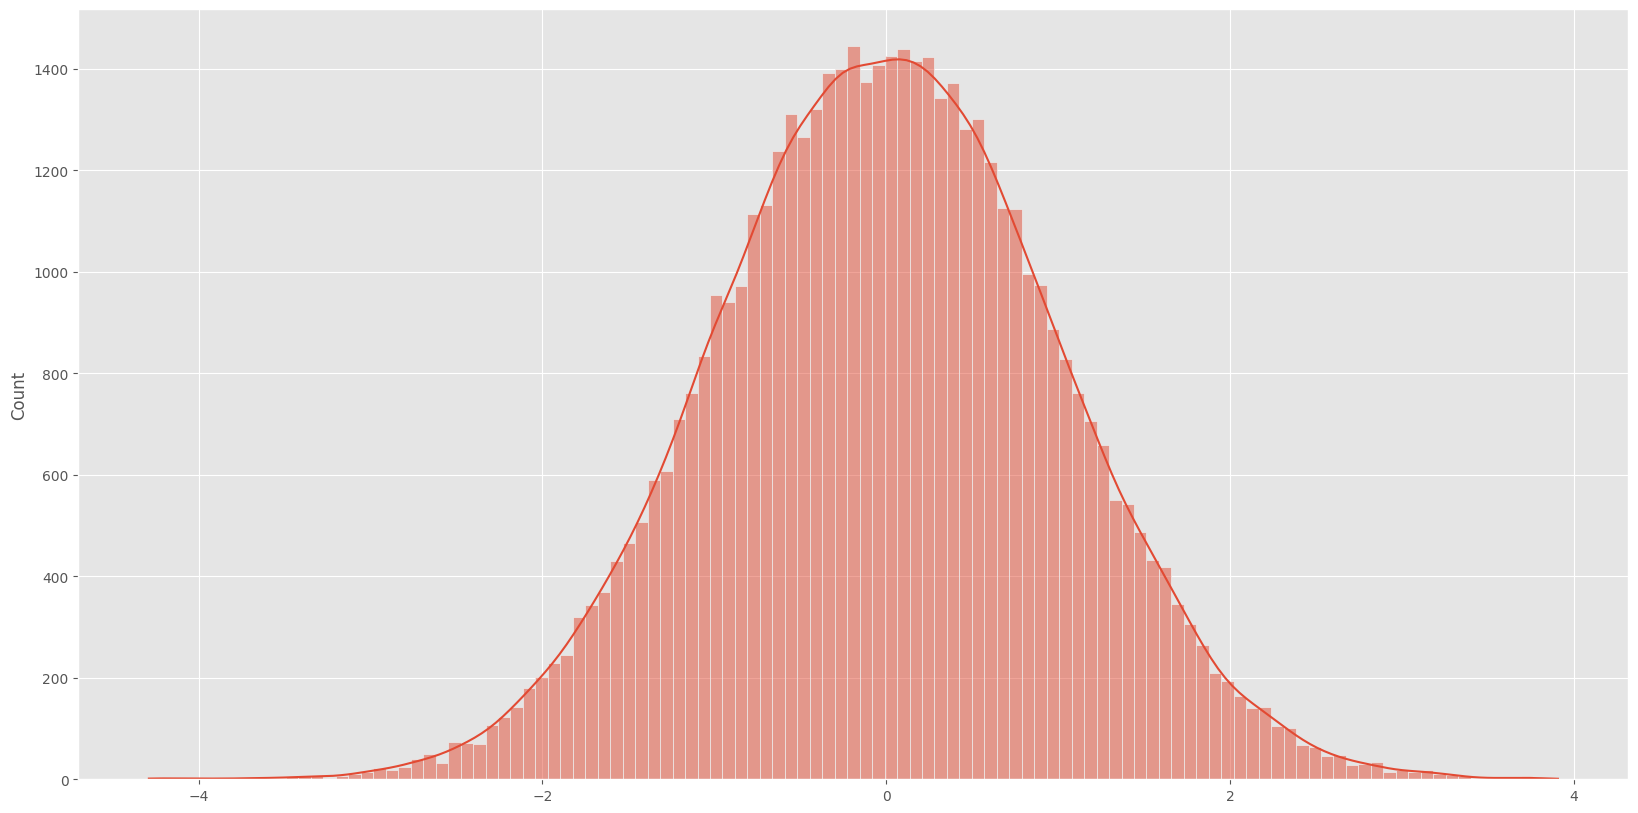

In [48]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

# Entropy (Optional)

Now we define a quantity called entropy, which essentially means how much information is conveyed by probability.

## A solid-liquid-gas example

When no probability is involved, i.e. everything is known before hand, no information is gained from the experiment. All the results of the experiment could be predetermined. Look at the images below, which represent the molecules of a solid, which have low to no entropy (perfectly ordered crystal).

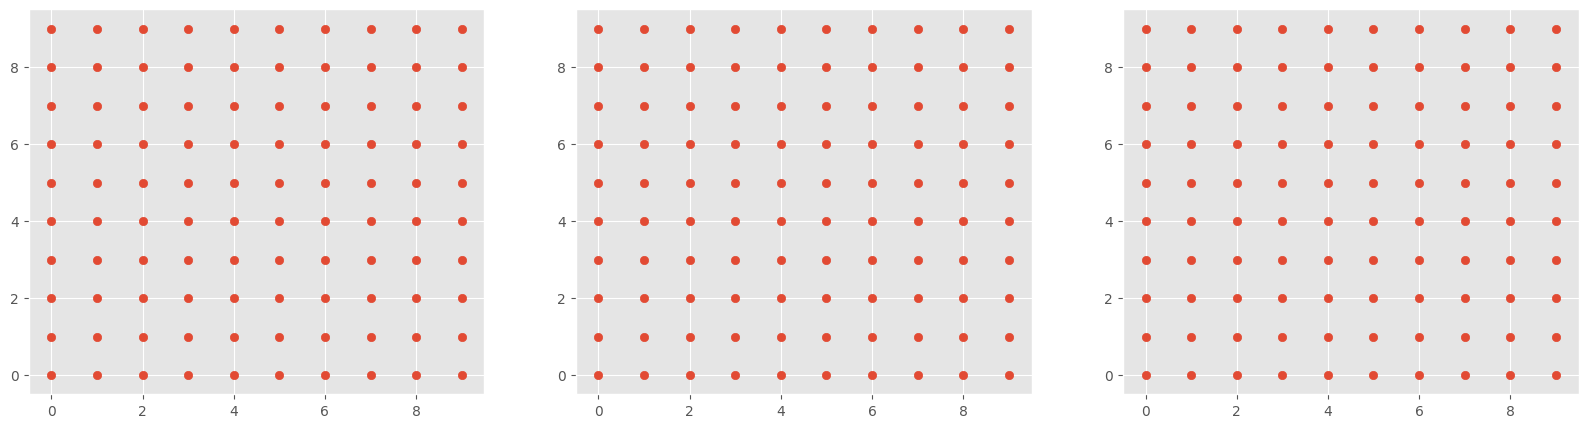

In [49]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

Now that we have probability in the game, we can visualize the same for say gases, when we draw the samples from a probability distribution that is uniform, a lot of information is conveyed.

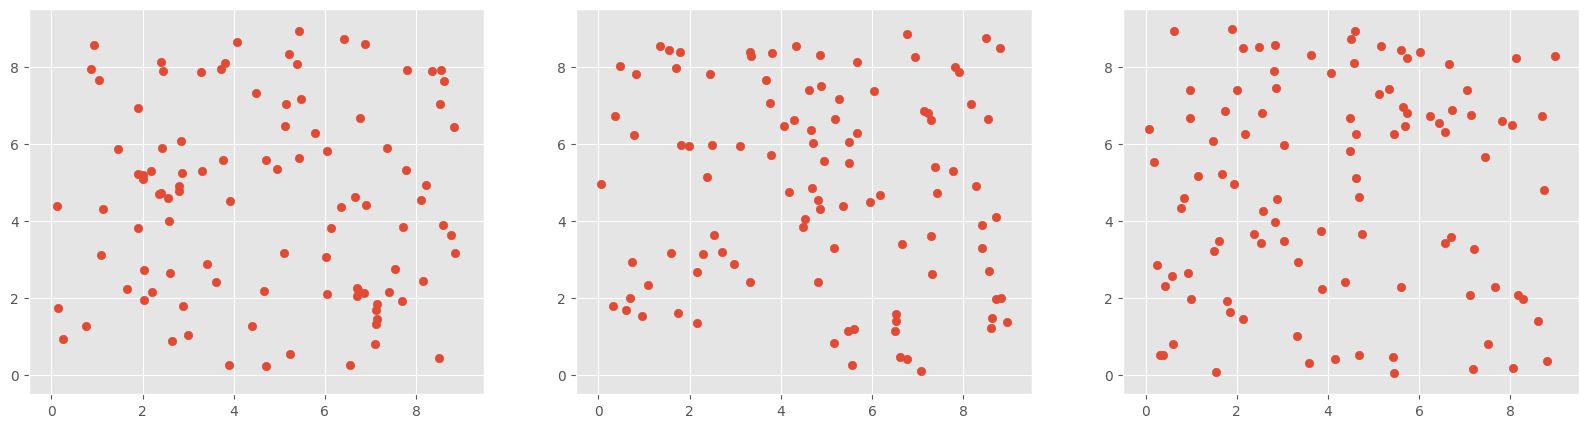

In [50]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

And if there is some randomness, but not complete, then less information is gained, and it has less entropy.

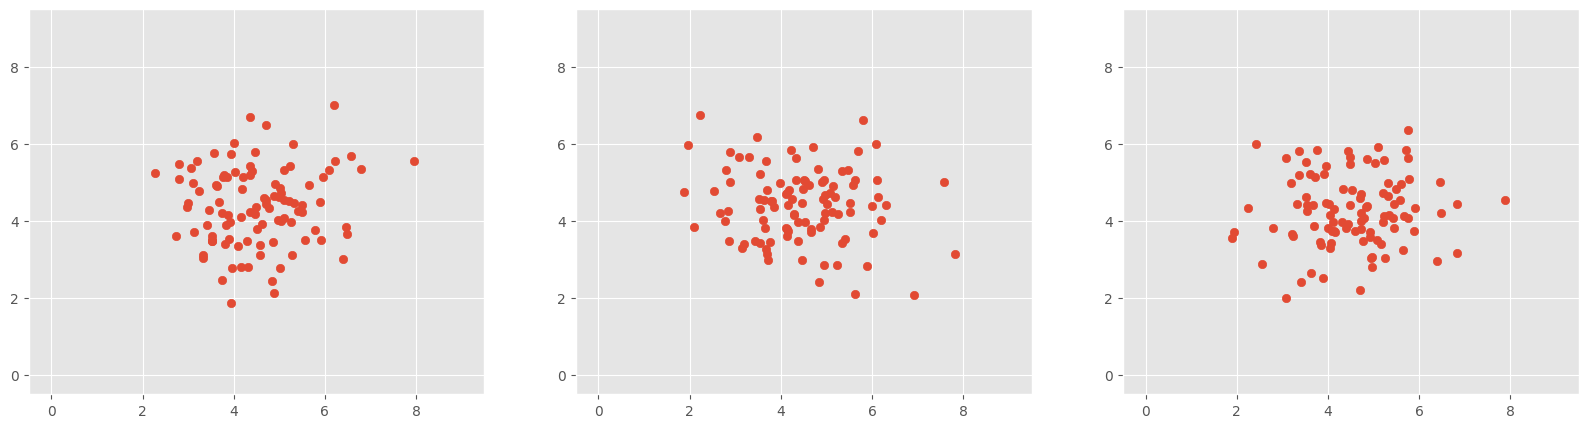

In [51]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

## So how to define Entropy?

Entropy is defined as the shortest expected length sequence that can contain the information of one experiment.

$$\text{Entropy} = -\sum_i \log(P_i) $$

Here is an example of a tree that tries to actually show this bound, called the Huffman tree. The more frequent letters like A have the shortest code, just call it 0, and the less frequent ones have longer code. We can show that to minimize the expected length of the code, that is the probability of the code times the length of the code averaged over all letters, the best result we can get is the bound shown above.

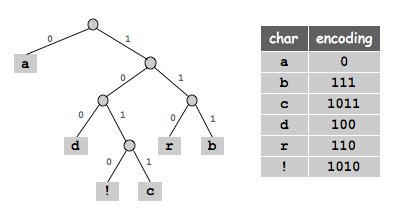